Name: Venkata Meghana Achanta

USC ID: 2578990261

In [ ]:
import numpy as np
import matplotlib as plt

In [ ]:
def datasplit(data_train):
  training_data = data_train[:,:2]
  training_label = data_train[:,2]
  return training_data,training_label

def class_split(x1):
  class_1_train = x1[x1[:,2] == 1][:,:2]
  class_2_train = x1[x1[:,2] == 2][:,:2]

  return class_1_train,class_2_train

In [ ]:
def normaldata(x,y):
  x1 = x - np.mean(x ,axis = 0)
  x2 = x1/np.std(x1, axis = 0)
  x3 = (y - np.mean(x ,axis = 0))/(np.std(x1, axis = 0))
  return x2,x3

In [ ]:
def concat(x1,x2):
  return np.concatenate((x1,x2), axis = 1)

In [ ]:
def meanscalculation(x1,x2):
  class1_mean = np.mean(x1, axis = 0).reshape(-1,1)
  class2_mean = np.mean(x2, axis = 0).reshape(-1,1)
  means = np.concatenate((class1_mean.T,class2_mean.T),axis = 0)
  return means

In [ ]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Tested in Python 3.6.3, OSX El Capitan, and subsequent versions
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries(training, label_train, sample_mean, fsize=(6,4)):

    '''
    Plot the decision boundaries and data points for minimum distance to
    class mean classifier

    training: traning data, N x d matrix:
        N: number of data points
        d: number of features
        if d > 2 then the first and second features will be plotted (1st and 2nd column (0 and 1 index))
    label_train: class lables correspond to training data, N x 1 array:
        N: number of data points
        the labels should start numbering from 1 (not 0)
        code works for up to 3 classes
    sample_mean: mean vector for each class, C x d matrix:
        C: number of classes
        each row of the sample_mean matrix is the coordinate of each sample mean
    '''

    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')



    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

In [ ]:
def train(training_data, x):
  l1 = np.linalg.norm((training_data - x[0]),axis = 1).reshape(-1,1)
  l2 = np.linalg.norm((training_data - x[1]), axis = 1).reshape(-1,1)

  n = l1.shape

  l3 = []
  for i in range(0, 100):
    if l1[i] < l2[i]:
      l3.append(1.)
    else:
      l3.append(2.)
  return l3

In [ ]:
def class_error(l1,l2):
  pred_label = np.array(l1)
  pred_label.reshape(-1,1)
  l2.reshape(-1,1)
  n = int(pred_label.shape[0])

  c = 0
  for i in range(0,n):
    if pred_label[i] != l2[i]:
      c = c + 1
  return (((c/n)*100))

Q1.a)

(100, 2) (100,)


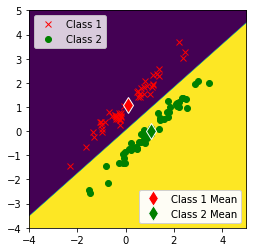

The classification error of the training data for Dataset-1 is:  0.0 %.
The classification error of the testing data for Dataset-1 is:  0.0 %.


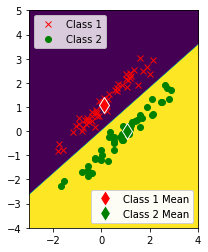

In [ ]:
#For Dataset-1
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))
#For Training Dataset
[train_data, train_label] = datasplit(data_train)
[class1, class2] = class_split(data_train)
mean_class = meanscalculation(class1, class2)
print(train_data.shape, train_label.shape)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the training data for Dataset-1 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
[test_data, test_label] = datasplit(data_test)
l4 = train(test_data, mean_class)
print('The classification error of the testing data for Dataset-1 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

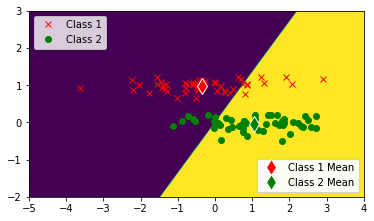

The classification error of the training data for Dataset-2 is:  17.0 %.
The classification error of the testing data for Dataset-2 is:  26.0 %.


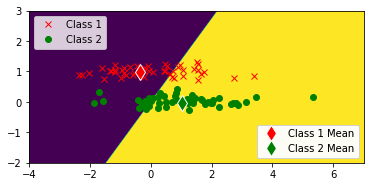

In [ ]:
#Dataset -2

data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))

#For Training Dataset
[train_data, train_label] = datasplit(data_train)
[class1, class2] = class_split(data_train)
mean_class = meanscalculation(class1, class2)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the training data for Dataset-2 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
[test_data, test_label] = datasplit(data_test)
l4 = train(test_data, mean_class)
print('The classification error of the testing data for Dataset-2 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

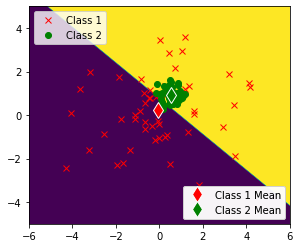

The classification error of the training data for Dataset-3 is:  23.0 %.
The classification error of the testing data for Dataset-3 is:  23.0 %.


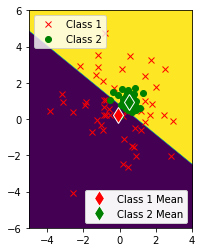

In [ ]:
#Dataset -3

data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))

#For Training Dataset
[train_data, train_label] = datasplit(data_train)
[class1, class2] = class_split(data_train)
mean_class = meanscalculation(class1, class2)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the training data for Dataset-3 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
[test_data, test_label] = datasplit(data_test)
l4 = train(test_data, mean_class)
print('The classification error of the testing data for Dataset-3 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

Q1.c)

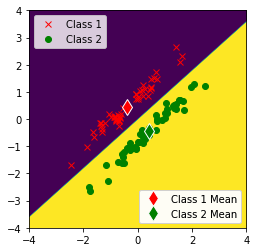

The classification error of the normalized training data for Dataset-1 is:  0.0 %.
The classification error of the normalized testing data for Dataset-1 is:  0.0 %.


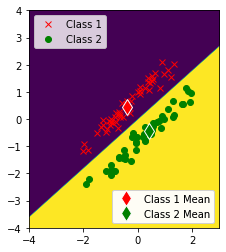

In [ ]:
#For Dataset-1
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))
#For Training Dataset
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)


train_set = concat(train_data,train_label.reshape(-1,1))
[class1, class2] = class_split(train_set)
mean_class = meanscalculation(class1, class2)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the normalized training data for Dataset-1 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
l4 = train(test_data, mean_class)
print('The classification error of the normalized testing data for Dataset-1 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

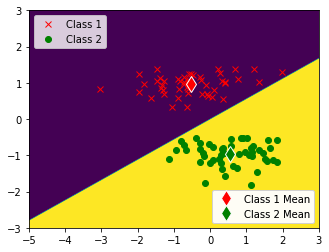

The classification error of the normalized training data for Dataset-2 is:  0.0 %.
The classification error of the normalized testing data for Dataset-2 is:  4.0 %.


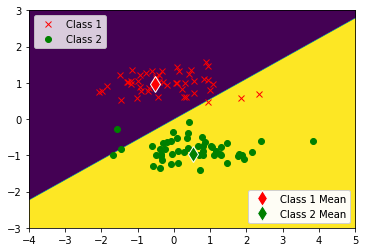

In [ ]:
#For Dataset-2
data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))

#For Training Dataset
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)


train_set = concat(train_data,train_label.reshape(-1,1))
[class1, class2] = class_split(train_set)
mean_class = meanscalculation(class1, class2)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the normalized training data for Dataset-2 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
l4 = train(test_data, mean_class)
print('The classification error of the normalized testing data for Dataset-2 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

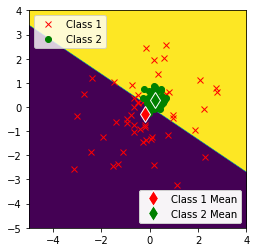

The classification error of the normalized training data for Dataset-3 is:  24.0 %.
The classification error of the normalized testing data for Dataset-3 is:  21.0 %.


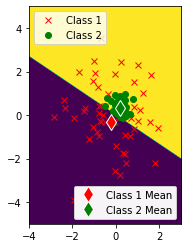

In [ ]:
#For Dataset-3
data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))
#For Training Dataset
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)


train_set = concat(train_data,train_label.reshape(-1,1))
[class1, class2] = class_split(train_set)
mean_class = meanscalculation(class1, class2)
plotDecBoundaries(train_data, train_label, mean_class)
l3 = train(train_data, mean_class)
print('The classification error of the normalized training data for Dataset-3 is: ', class_error(l3,train_label),'%.')

#For Testing Dataset
l4 = train(test_data, mean_class)
print('The classification error of the normalized testing data for Dataset-3 is: ', class_error(l4,test_label),'%.')
plotDecBoundaries(test_data, test_label, mean_class)

Q1.e)

Lowest training error is 0.0 % with m vlaue 27
The best rm value is [[-7 10]]


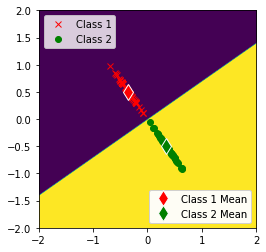

Classification error rate for testing data: 0.0 %


Text(0, 0.5, 'Error Values')

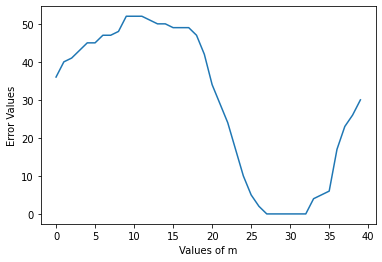

In [ ]:
def proj(m, x):

  x_out = []
  r_m = []
  if 0 <= m <= 9:
        r_m = np.array([[10, m]])
  elif 10 <= m <= 29:
        r_m = np.array([[20-m, 10]])
  else:
        r_m = np.array([[-10, 40-m]])

  norm_r = np.linalg.norm(r_m)
  for i in range(len(x)):
      xvector = np.reshape(x[i], (2,1))
      x_out.append(np.dot(np.dot(r_m, xvector), r_m)/np.square(norm_r))

  return np.array(x_out).reshape(100, 2)

def best(error, means):
    m_best = np.argmin(error)
    means_best = means[m_best]
    if 0 <= m_best <= 9:
        return np.array([[0, m_best]]), m_best, means_best
    elif 10 <= m_best <= 29:
        return np.array([[20-m_best, 10]]), m_best, means_best
    else:
        return np.array([[-10, 40-m_best]]), m_best, means_best


data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)
train_set = concat(train_data,train_label.reshape(-1,1))
# X = normalize(data[:, :2])
# y = data[:, 2]
[class1, class2] = class_split(train_set)

y_out = []
means_out = []
for i in range(40):
  vector_mod = proj(i, train_data)
  train_set = concat(vector_mod,train_label.reshape(-1,1))
  [class1, class2] = class_split(train_set)
  c = meanscalculation(class1, class2)
  means_out.append(c)
  y_out.append(train(vector_mod, c))

y_out = np.array(y_out)
means_out = np.array(means_out)

errorlist = []
for i in range(len(y_out)):
  errorlist.append(class_error(y_out[i], train_label))

errorlist = np.array(errorlist)
#plot_train_vs_m(error_rates)
r_m, m, mean = best(errorlist, means_out)
print("Lowest training error is {} % with m vlaue {}".format(errorlist[m], m))
print("The best rm value is {}".format(r_m))


test_vector = proj(m, test_data)
test_out = train(test_vector, mean)
test_out = np.array(test_out)
plotDecBoundaries(test_vector, test_out, mean)

test_error = class_error(test_out, test_label)
print("Classification error rate for testing data: {} %".format(test_error))

plt.plot(errorlist)
plt.xlabel('Values of m')
plt.ylabel('Error Values')

Lowest training error is 0.0 % with m vlaue 18
The best rm value is [[ 2 10]]


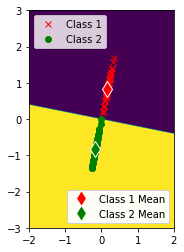

Classification error rate for testing data: 1.0 %


Text(0, 0.5, 'Error Values')

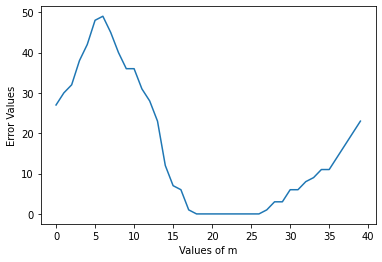

In [ ]:
def proj(m, x):

  x_out = []
  r_m = []
  if 0 <= m <= 9:
        r_m = np.array([[10, m]])
  elif 10 <= m <= 29:
        r_m = np.array([[20-m, 10]])
  else:
        r_m = np.array([[-10, 40-m]])

  norm_r = np.linalg.norm(r_m)
  for i in range(len(x)):
      xvector = np.reshape(x[i], (2,1))
      x_out.append(np.dot(np.dot(r_m, xvector), r_m)/np.square(norm_r))

  return np.array(x_out).reshape(100, 2)

def best(error, means):
    m_best = np.argmin(error)
    means_best = means[m_best]
    if 0 <= m_best <= 9:
        return np.array([[0, m_best]]), m_best, means_best
    elif 10 <= m_best <= 29:
        return np.array([[20-m_best, 10]]), m_best, means_best
    else:
        return np.array([[-10, 40-m_best]]), m_best, means_best


data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)
train_set = concat(train_data,train_label.reshape(-1,1))
# X = normalize(data[:, :2])
# y = data[:, 2]
[class1, class2] = class_split(train_set)

y_out = []
means_out = []
for i in range(40):
  vector_mod = proj(i, train_data)
  train_set = concat(vector_mod,train_label.reshape(-1,1))
  [class1, class2] = class_split(train_set)
  c = meanscalculation(class1, class2)
  means_out.append(c)
  y_out.append(train(vector_mod, c))

y_out = np.array(y_out)
means_out = np.array(means_out)

errorlist = []
for i in range(len(y_out)):
  errorlist.append(class_error(y_out[i], train_label))

errorlist = np.array(errorlist)
#plot_train_vs_m(error_rates)
r_m, m, mean = best(errorlist, means_out)
print("Lowest training error is {} % with m vlaue {}".format(errorlist[m], m))
print("The best rm value is {}".format(r_m))


test_vector = proj(m, test_data)
test_out = train(test_vector, mean)
test_out = np.array(test_out)
plotDecBoundaries(test_vector, test_out, mean)

test_error = class_error(test_out, test_label)
print("Classification error rate for testing data: {} %".format(test_error))

plt.plot(errorlist)
plt.xlabel('Values of m')
plt.ylabel('Error Values')


Lowest training error is 21.0 % with m vlaue 8
The best rm value is [[0 8]]


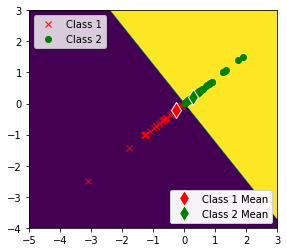

Classification error rate for testing data: 24.0 %


Text(0, 0.5, 'Error Values')

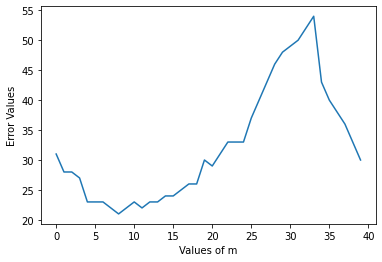

In [ ]:
def proj(m, x):

  x_out = []
  r_m = []
  if 0 <= m <= 9:
        r_m = np.array([[10, m]])
  elif 10 <= m <= 29:
        r_m = np.array([[20-m, 10]])
  else:
        r_m = np.array([[-10, 40-m]])

  norm_r = np.linalg.norm(r_m)
  for i in range(len(x)):
      xvector = np.reshape(x[i], (2,1))
      x_out.append(np.dot(np.dot(r_m, xvector), r_m)/np.square(norm_r))

  return np.array(x_out).reshape(100, 2)

def best(error, means):
    m_best = np.argmin(error)
    means_best = means[m_best]
    if 0 <= m_best <= 9:
        return np.array([[0, m_best]]), m_best, means_best
    elif 10 <= m_best <= 29:
        return np.array([[20-m_best, 10]]), m_best, means_best
    else:
        return np.array([[-10, 40-m_best]]), m_best, means_best


data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))
[x1, train_label] = datasplit(data_train)
[test_x, test_label] = datasplit(data_test)

[train_data, test_data] = normaldata(x1, test_x)
train_set = concat(train_data,train_label.reshape(-1,1))
# X = normalize(data[:, :2])
# y = data[:, 2]
[class1, class2] = class_split(train_set)

y_out = []
means_out = []
for i in range(40):
  vector_mod = proj(i, train_data)
  train_set = concat(vector_mod,train_label.reshape(-1,1))
  [class1, class2] = class_split(train_set)
  c = meanscalculation(class1, class2)
  means_out.append(c)
  y_out.append(train(vector_mod, c))

y_out = np.array(y_out)
means_out = np.array(means_out)

errorlist = []
for i in range(len(y_out)):
  errorlist.append(class_error(y_out[i], train_label))

errorlist = np.array(errorlist)
#plot_train_vs_m(error_rates)
r_m, m, mean = best(errorlist, means_out)
print("Lowest training error is {} % with m vlaue {}".format(errorlist[m], m))
print("The best rm value is {}".format(r_m))


test_vector = proj(m, test_data)
test_out = train(test_vector, mean)
test_out = np.array(test_out)
plotDecBoundaries(test_vector, test_out, mean)

test_error = class_error(test_out, test_label)
print("Classification error rate for testing data: {} %".format(test_error))

plt.plot(errorlist)
plt.xlabel('Values of m')
plt.ylabel('Error Values')
